In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
import pandas as pd

In [2]:
#Reading the Training data (virtually generated) from a file 
#Input data
x_data = pd.read_csv('x_rec_16_data_4.csv')
x_data=x_data.values[:,1:]
print("read_x_data")
#Output data
y_data = pd.read_csv('y_rec_16_data_4.csv')
y_data=y_data.values[:,1:]
print("read_y_data")
print(x_data[:2,:])
print(y_data[:2,:])

read_x_data
read_y_data
[[-0.97820564  0.29297193 -0.07061703 -0.96544182  0.2754832  -0.07559271
  -0.95055615  0.26713403 -0.06478687 -0.94939434  0.28851273 -0.05467842
  -1.02291172  0.31880814 -0.06668594 -1.02036267  0.29820167 -0.09116619
  -0.98972578  0.26476729 -0.09036746 -0.9837491   0.30531915 -0.07307987
  -1.06898421  0.34968716 -0.03087716 -1.12097493  0.35989869 -0.06120685
  -1.15727766  0.31518646 -0.15790448 -1.05000599  0.3741363  -0.18206539
  -0.59768246  0.20031284 -0.03087716 -0.54569173  0.19010131 -0.06120685
  -0.50938901  0.23481354 -0.15790448 -0.61666068  0.1758637  -0.18206539]
 [-0.96599853  0.27606791 -0.07565659 -0.95086392  0.26695474 -0.06533805
  -0.94930712  0.28749528 -0.05464469 -0.94653851  0.31281185 -0.06572685
  -1.02090166  0.29927989 -0.09043877 -0.99077126  0.26520123 -0.09134644
  -0.98375094  0.30325434 -0.07242409 -0.95978485  0.33228947 -0.10427239
  -1.11885836  0.35967639 -0.059538   -1.15987075  0.32063895 -0.15402077
  -1.05699218

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x_data, y_data)
print(np.shape(X_train), np.shape(y_train), "training data size")
print(np.shape(X_val), np.shape(y_val),"Validation data size")
#print(X_train[0:9,:])

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
xtrain_scale=scaler_x.transform(X_train)

scaler_x.fit(X_val)
xval_scale=scaler_x.transform(X_val)

scaler_y.fit(y_train)
ytrain_scale=scaler_y.transform(y_train)

scaler_y.fit(y_val)
yval_scale=scaler_y.transform(y_val)

(3072, 48) (3072, 7) training data size
(1024, 48) (1024, 7) Validation data size


In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense
from numpy import loadtxt
from keras.models import load_model
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm


input_layer = Input(shape=(48,))
hidden_layer_1 = Dense(units = 200, activation = 'relu')(input_layer)
hidden_layer_2 = Dense(units = 200, activation = 'relu')(hidden_layer_1)
output_layer = Dense(units = 7, activation = 'linear')(hidden_layer_2)
model = Model(inputs = input_layer, outputs = output_layer, name = 'Rectangular_4by4_sensor_concept_NN')

#for specific values of learning rate
#opt = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='mae', optimizer="adam")
#metrics=['accuracy']
##Implementing Early stopping

my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)]
#    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
#    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
#    tf.keras.callbacks.CSVLogger('Points_5_training.log')]
# Display the model
model.summary()


Model: "Rectangular_4by4_sensor_concept_NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48)]              0         
_________________________________________________________________
dense (Dense)                (None, 200)               9800      
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 1407      
Total params: 51,407
Trainable params: 51,407
Non-trainable params: 0
_________________________________________________________________


In [5]:
history_1 = model.fit(xtrain_scale, ytrain_scale, epochs=20, verbose=2, validation_data=(xval_scale,yval_scale))
#history_1 = model.fit(xtrain_scale, ytrain_scale, epochs=20, verbose=1, callbacks=my_callbacks, validation_data=(xval_scale,yval_scale))


Epoch 1/20
96/96 - 1s - loss: 0.2605 - val_loss: 0.2327
Epoch 2/20
96/96 - 0s - loss: 0.2112 - val_loss: 0.2028
Epoch 3/20
96/96 - 0s - loss: 0.1903 - val_loss: 0.1848
Epoch 4/20
96/96 - 0s - loss: 0.1758 - val_loss: 0.1749
Epoch 5/20
96/96 - 0s - loss: 0.1664 - val_loss: 0.1727
Epoch 6/20
96/96 - 0s - loss: 0.1576 - val_loss: 0.1641
Epoch 7/20
96/96 - 0s - loss: 0.1525 - val_loss: 0.1540
Epoch 8/20
96/96 - 0s - loss: 0.1487 - val_loss: 0.1492
Epoch 9/20
96/96 - 0s - loss: 0.1428 - val_loss: 0.1510
Epoch 10/20
96/96 - 0s - loss: 0.1390 - val_loss: 0.1406
Epoch 11/20
96/96 - 0s - loss: 0.1347 - val_loss: 0.1414
Epoch 12/20
96/96 - 0s - loss: 0.1336 - val_loss: 0.1349
Epoch 13/20
96/96 - 0s - loss: 0.1325 - val_loss: 0.1362
Epoch 14/20
96/96 - 0s - loss: 0.1277 - val_loss: 0.1323
Epoch 15/20
96/96 - 0s - loss: 0.1254 - val_loss: 0.1317
Epoch 16/20
96/96 - 0s - loss: 0.1239 - val_loss: 0.1257
Epoch 17/20
96/96 - 0s - loss: 0.1220 - val_loss: 0.1300
Epoch 18/20
96/96 - 0s - loss: 0.1199 - 

In [6]:
#to evaluate on training data
#scores=model.evaluate(xtrain_scale,y_train_scale,verbose=0)
#print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
#model.save("model.h5")
#print("saved the model to disk")
#to load model
#model=load_model('model.h5')

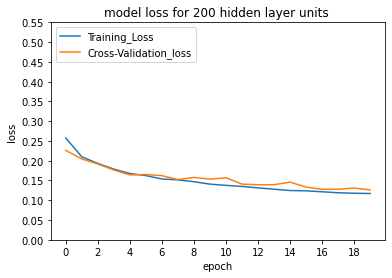

In [7]:
import keras
from matplotlib import pyplot as plt
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss for 200 hidden layer units ')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training_Loss ', 'Cross-Validation_loss'], loc='upper left')
#plt.xlim(0.0,)
#plt.ylim(0.0,0.5)
plt.xticks(np.arange(0.0, 19, 2))
plt.yticks(np.arange(0.0, 0.6, 0.05))
plt.savefig('performance_for_200_hiddenunits_4p.png', dpi=1200)
plt.show()


In [10]:
###for 500 hidden layer units
input_layer = Input(shape=(48,))
hidden_layer_1 = Dense(units = 28, activation = 'relu')(input_layer)
hidden_layer_2 = Dense(units = 28, activation = 'relu')(hidden_layer_1)
output_layer = Dense(units = 7, activation = 'linear')(hidden_layer_2)
model = Model(inputs = input_layer, outputs = output_layer, name = 'Rectangular_4by4_sensor_concept_NN')

#for specific values of learning rate
#opt = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='mae', optimizer="adam")




In [11]:
history_2 = model.fit(xtrain_scale, ytrain_scale, epochs=20, verbose=2, validation_data=(xval_scale,yval_scale))

Epoch 1/20
96/96 - 0s - loss: 0.3554 - val_loss: 0.2750
Epoch 2/20
96/96 - 0s - loss: 0.2550 - val_loss: 0.2519
Epoch 3/20
96/96 - 0s - loss: 0.2408 - val_loss: 0.2438
Epoch 4/20
96/96 - 0s - loss: 0.2332 - val_loss: 0.2354
Epoch 5/20
96/96 - 0s - loss: 0.2260 - val_loss: 0.2290
Epoch 6/20
96/96 - 0s - loss: 0.2196 - val_loss: 0.2235
Epoch 7/20
96/96 - 0s - loss: 0.2137 - val_loss: 0.2160
Epoch 8/20
96/96 - 0s - loss: 0.2092 - val_loss: 0.2125
Epoch 9/20
96/96 - 0s - loss: 0.2015 - val_loss: 0.2035
Epoch 10/20
96/96 - 0s - loss: 0.1958 - val_loss: 0.1984
Epoch 11/20
96/96 - 0s - loss: 0.1921 - val_loss: 0.1932
Epoch 12/20
96/96 - 0s - loss: 0.1868 - val_loss: 0.1917
Epoch 13/20
96/96 - 0s - loss: 0.1825 - val_loss: 0.1893
Epoch 14/20
96/96 - 0s - loss: 0.1798 - val_loss: 0.1832
Epoch 15/20
96/96 - 0s - loss: 0.1765 - val_loss: 0.1790
Epoch 16/20
96/96 - 0s - loss: 0.1738 - val_loss: 0.1774
Epoch 17/20
96/96 - 0s - loss: 0.1717 - val_loss: 0.1794
Epoch 18/20
96/96 - 0s - loss: 0.1695 - 

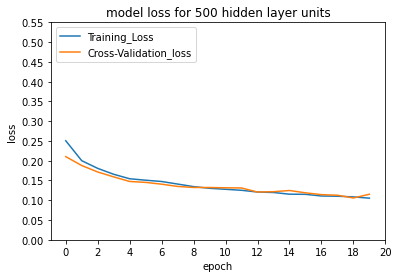

In [10]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss for 500 hidden layer units')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training_Loss ', 'Cross-Validation_loss'], loc='upper left')
#plt.xlim(0.0,)
#plt.ylim(0.0,0.5)
plt.xticks(np.arange(0.0, 21, 2))
plt.yticks(np.arange(0.0, 0.6, 0.05))
plt.savefig('performance_for_500_hiddenunits_4p.png', dpi=1200)
plt.show()

In [12]:
###for 700 hidden units
input_layer = Input(shape=(48,))
hidden_layer_1 = Dense(units = 100, activation = 'relu')(input_layer)
hidden_layer_2 = Dense(units = 100, activation = 'relu')(hidden_layer_1)
output_layer = Dense(units = 7, activation = 'linear')(hidden_layer_2)
model = Model(inputs = input_layer, outputs = output_layer, name = 'Rectangular_4by4_sensor_concept_NN')

#for specific values of learning rate
#opt = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='mae', optimizer="adam")



In [13]:
history_3 = model.fit(xtrain_scale, ytrain_scale, epochs=20, verbose=2, validation_data=(xval_scale,yval_scale))

Epoch 1/20
96/96 - 0s - loss: 0.2807 - val_loss: 0.2404
Epoch 2/20
96/96 - 0s - loss: 0.2283 - val_loss: 0.2214
Epoch 3/20
96/96 - 0s - loss: 0.2101 - val_loss: 0.2062
Epoch 4/20
96/96 - 0s - loss: 0.1953 - val_loss: 0.1920
Epoch 5/20
96/96 - 0s - loss: 0.1831 - val_loss: 0.1896
Epoch 6/20
96/96 - 0s - loss: 0.1749 - val_loss: 0.1745
Epoch 7/20
96/96 - 0s - loss: 0.1674 - val_loss: 0.1684
Epoch 8/20
96/96 - 0s - loss: 0.1618 - val_loss: 0.1681
Epoch 9/20
96/96 - 0s - loss: 0.1573 - val_loss: 0.1601
Epoch 10/20
96/96 - 0s - loss: 0.1538 - val_loss: 0.1571
Epoch 11/20
96/96 - 0s - loss: 0.1510 - val_loss: 0.1601
Epoch 12/20
96/96 - 0s - loss: 0.1465 - val_loss: 0.1552
Epoch 13/20
96/96 - 0s - loss: 0.1435 - val_loss: 0.1516
Epoch 14/20
96/96 - 0s - loss: 0.1422 - val_loss: 0.1508
Epoch 15/20
96/96 - 0s - loss: 0.1387 - val_loss: 0.1403
Epoch 16/20
96/96 - 0s - loss: 0.1371 - val_loss: 0.1437
Epoch 17/20
96/96 - 0s - loss: 0.1335 - val_loss: 0.1431
Epoch 18/20
96/96 - 0s - loss: 0.1309 - 

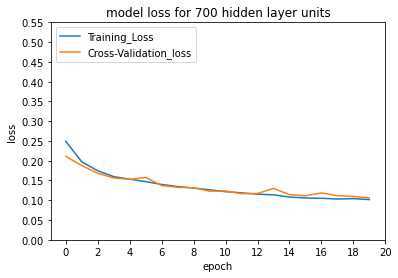

In [13]:
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss for 700 hidden layer units')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training_Loss ', 'Cross-Validation_loss'], loc='upper left')
#plt.xlim(0.0,)
#plt.ylim(0.0,0.5)
plt.xticks(np.arange(0.0, 21, 2))
plt.yticks(np.arange(0.0, 0.6, 0.05))
plt.savefig('performance_for_700_hiddenunits_4p.png', dpi=1200)
plt.show()

In [19]:
###for 5 hidden layers
input_layer = Input(shape=(48,))
hidden_layer_1 = Dense(units = 500, activation = 'relu')(input_layer)
hidden_layer_2 = Dense(units = 500, activation = 'relu')(hidden_layer_1)
output_layer = Dense(units = 7, activation = 'linear')(hidden_layer_2)
model = Model(inputs = input_layer, outputs = output_layer, name = 'Rectangular_4by4_sensor_concept_NN')

#for specific values of learning rate
#opt = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='mae', optimizer="adam")


In [20]:
history_5 = model.fit(xtrain_scale, ytrain_scale, epochs=20, verbose=2, validation_data=(xval_scale,yval_scale))

Epoch 1/20
96/96 - 1s - loss: 0.2463 - val_loss: 0.2153
Epoch 2/20
96/96 - 1s - loss: 0.1959 - val_loss: 0.1927
Epoch 3/20
96/96 - 1s - loss: 0.1740 - val_loss: 0.1743
Epoch 4/20
96/96 - 1s - loss: 0.1668 - val_loss: 0.1638
Epoch 5/20
96/96 - 1s - loss: 0.1550 - val_loss: 0.1571
Epoch 6/20
96/96 - 1s - loss: 0.1461 - val_loss: 0.1509
Epoch 7/20
96/96 - 1s - loss: 0.1445 - val_loss: 0.1451
Epoch 8/20
96/96 - 1s - loss: 0.1398 - val_loss: 0.1397
Epoch 9/20
96/96 - 1s - loss: 0.1333 - val_loss: 0.1309
Epoch 10/20
96/96 - 1s - loss: 0.1287 - val_loss: 0.1360
Epoch 11/20
96/96 - 1s - loss: 0.1262 - val_loss: 0.1306
Epoch 12/20
96/96 - 1s - loss: 0.1216 - val_loss: 0.1267
Epoch 13/20
96/96 - 1s - loss: 0.1199 - val_loss: 0.1256
Epoch 14/20
96/96 - 1s - loss: 0.1150 - val_loss: 0.1203
Epoch 15/20
96/96 - 1s - loss: 0.1134 - val_loss: 0.1226
Epoch 16/20
96/96 - 1s - loss: 0.1130 - val_loss: 0.1158
Epoch 17/20
96/96 - 1s - loss: 0.1103 - val_loss: 0.1166
Epoch 18/20
96/96 - 1s - loss: 0.1110 - 

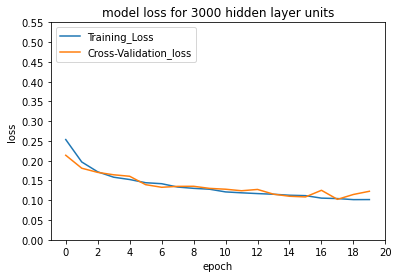

In [16]:
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss for 3000 hidden layer units')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training_Loss ', 'Cross-Validation_loss'], loc='upper left')
#plt.xlim(0.0,)
#plt.ylim(0.0,0.5)
plt.xticks(np.arange(0.0, 21, 2))
plt.yticks(np.arange(0.0, 0.6, 0.05))
plt.savefig('performance_for_3000_hiddenunits_4p.png', dpi=1200)
plt.show()

In [16]:
###for 5 hidden layers
input_layer = Input(shape=(48,))
hidden_layer_1 = Dense(units = 3000, activation = 'relu')(input_layer)
hidden_layer_2 = Dense(units = 3000, activation = 'relu')(hidden_layer_1)
output_layer = Dense(units = 7, activation = 'linear')(hidden_layer_2)
model = Model(inputs = input_layer, outputs = output_layer, name = 'Rectangular_4by4_sensor_concept_NN')

#for specific values of learning rate
#opt = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='mae', optimizer="adam")


In [17]:
history_4 = model.fit(xtrain_scale, ytrain_scale, epochs=20, verbose=2, validation_data=(xval_scale,yval_scale))

Epoch 1/20
96/96 - 8s - loss: 0.2466 - val_loss: 0.2107
Epoch 2/20
96/96 - 7s - loss: 0.1935 - val_loss: 0.1980
Epoch 3/20
96/96 - 8s - loss: 0.1726 - val_loss: 0.1623
Epoch 4/20
96/96 - 8s - loss: 0.1620 - val_loss: 0.1524
Epoch 5/20
96/96 - 7s - loss: 0.1498 - val_loss: 0.1541
Epoch 6/20
96/96 - 8s - loss: 0.1487 - val_loss: 0.1469
Epoch 7/20
96/96 - 8s - loss: 0.1401 - val_loss: 0.1409
Epoch 8/20
96/96 - 8s - loss: 0.1307 - val_loss: 0.1278
Epoch 9/20
96/96 - 8s - loss: 0.1274 - val_loss: 0.1302
Epoch 10/20
96/96 - 8s - loss: 0.1263 - val_loss: 0.1311
Epoch 11/20
96/96 - 8s - loss: 0.1209 - val_loss: 0.1239
Epoch 12/20
96/96 - 8s - loss: 0.1206 - val_loss: 0.1127
Epoch 13/20
96/96 - 8s - loss: 0.1146 - val_loss: 0.1246
Epoch 14/20
96/96 - 8s - loss: 0.1166 - val_loss: 0.1183
Epoch 15/20
96/96 - 8s - loss: 0.1126 - val_loss: 0.1120
Epoch 16/20
96/96 - 8s - loss: 0.1065 - val_loss: 0.1085
Epoch 17/20
96/96 - 7s - loss: 0.1055 - val_loss: 0.1039
Epoch 18/20
96/96 - 8s - loss: 0.1017 - 

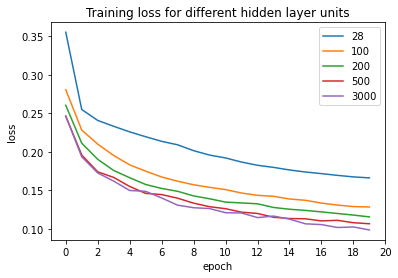

In [22]:
plt.plot(history_2.history['loss'])
plt.plot(history_3.history['loss'])
plt.plot(history_1.history['loss'])
plt.plot(history_5.history['loss'])
plt.plot(history_4.history['loss'])
plt.title('Training loss for different hidden layer units')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['28','100','200','500','3000'], loc='upper right')
#plt.xlim(0.0,)
#plt.ylim(0.0,0.5)
plt.xticks(np.arange(0.0, 21, 2))
#plt.yticks(np.arange(0.0, 0.6, 0.05))
plt.savefig('Training_Loss_hidden_units.png', dpi=300)
plt.show()

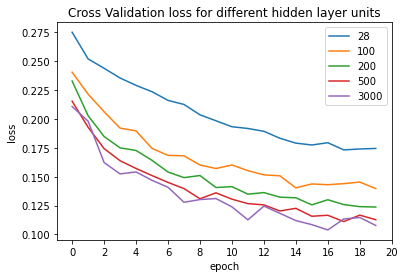

In [23]:
plt.plot(history_2.history['val_loss'])
plt.plot(history_3.history['val_loss'])
plt.plot(history_1.history['val_loss'])
plt.plot(history_5.history['val_loss'])
plt.plot(history_4.history['val_loss'])
plt.title('Cross Validation loss for different hidden layer units')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['28','100','200','500','3000'], loc='upper right')
#plt.xlim(0.0,)
#plt.ylim(0.0,0.5)
plt.xticks(np.arange(0.0, 21, 2))
#plt.yticks(np.arange(0.0, 0.6, 0.05))
plt.savefig('Validation_Loss_hidden_units.png', dpi=300)
plt.show()